In [61]:
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline
import cv2


Slicing the image:

Splitting image to tiles of MxN pixels (assuming im is numpy.ndarray):

In [123]:
image_path='/Users/jamesmoss/Documents/GitHub/SideProjects/Best_WWF_Words/IMG_2574.jpeg'
image = cv2.imread(image_path)

im = np.asarray(Image.open(image_path))#.convert('L'))

M = im.shape[0]/15
N = im.shape[1]/15

tiles = [im[x:round(x+M),y:round(y+N)] for x in range(0,im.shape[0],round(M)) for y in range(0,im.shape[1],round(N))]
tiles_im=[Image.fromarray(np.uint8(tile)) for tile in tiles]

img = Image.fromarray(np.uint8(im))


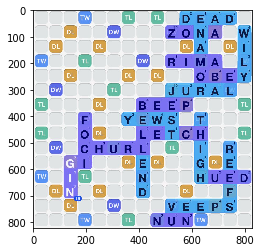

In [129]:
imshow(image)


In [140]:
def split_board(board_image):
    M = board_image.shape[0]/15
    N = board_image.shape[1]/15

    image_tiles = [board_image[x:round(x+M),y:round(y+N)] for x in range(0,board_image.shape[0],round(M)) for y in range(0,board_image.shape[1],round(N))]
    return image_tiles

def tile_to_letter(tile_image):
    gray = cv2.cvtColor(tile_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    #thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]
    #text=''
    text = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
    return text

def board_image_to_array(board_image):
    image_tiles=split_board(board_image)
    board_array=np.empty([15,15], dtype=str)
    for tile in image_tiles:
        letter=tile_to_letter(tile)
        np.append(board_array, letter)
    return board_array

In [145]:
#board_image_to_array(image)
tile_to_letter(image_tiles[90])

gray = cv2.cvtColor(image_tiles[90], cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
#thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]
#text=''
text = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
text

str

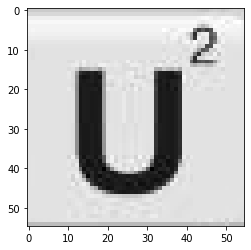

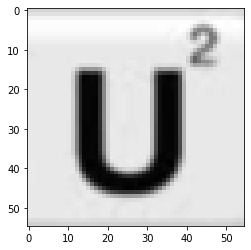

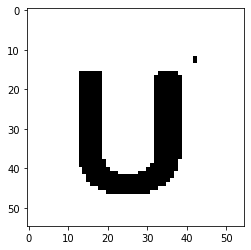

U



In [131]:
M = image.shape[0]/15
N = image.shape[1]/15

image_tiles = [image[x:round(x+M),y:round(y+N)] for x in range(0,image.shape[0],round(M)) for y in range(0,image.shape[1],round(N))]
rgb_image = cv2.cvtColor(image_tiles[90], cv2.COLOR_BGR2RGB)

imshow(image_tiles[90])
gray = cv2.cvtColor(image_tiles[90], cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()
blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur, cmap="gray")
plt.show()

#thresh = thresholding(blur)
#thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh, cmap="gray")
plt.show()

data = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
print(data)


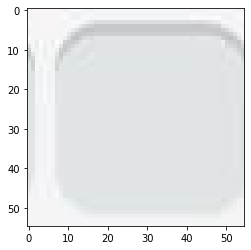

In [117]:

plt.imshow(image_tiles[1], cmap="gray")
plt.show()


In [22]:
tile_images=[]
for tile in tiles:
    im = Image.fromarray(np.uint8(tile))

In [23]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/
#py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding

#https://stackoverflow.com/questions/19268648/using-tesseract-to-recognize-license-plates/19418347#19418347
#http://www.tammo80.nl/weblog/?p=1396
#https://stackoverflow.com/questions/384759/how-to-convert-a-pil-image-into-a-numpy-array

# from PIL import Image
# import numpy as np
# im = Image.open('1.jpg')
# im2arr = np.array(im) # im2arr.shape: height x width x channel
# arr2im = Image.fromarray(im2arr)


In [24]:
len(tiles)

256

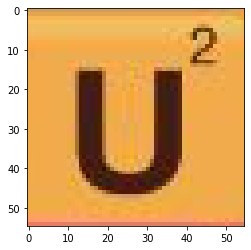

In [68]:
imshow(tiles[90])
# imshow(img)

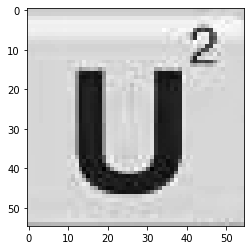

In [92]:
gray = cv2.cvtColor(tiles[90], cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray,95,255,cv2.THRESH_BINARY)
#retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#th3 = cv2.adaptiveThreshold(tiles[90],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(gray, cmap = plt.cm.gray)

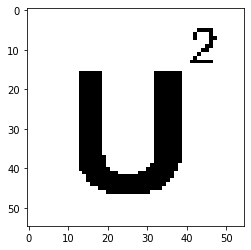

In [66]:
ret,thresh1 = cv2.threshold(tiles[90],100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = plt.cm.gray)

In [65]:
# im = Image.fromarray(np.uint8(tiles[233]))
print(pytesseract.image_to_string(thresh1))

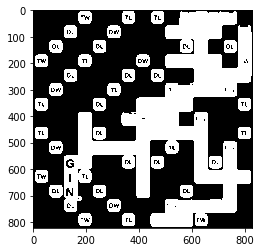

In [27]:
imge = cv2.imread(image_path,0)
imge = cv2.medianBlur(imge,5)
imge = cv2.bitwise_not(imge)


ret2,th2 = cv2.threshold(imge,0,300,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(th2,'gray')

#th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#imshow(th2)

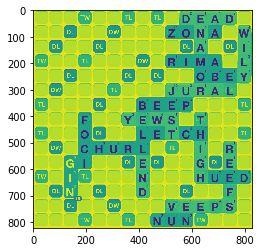

In [28]:
img = cv2.imread(image_path,0)
# img = cv2.bitwise_not(img)

imshow(img)


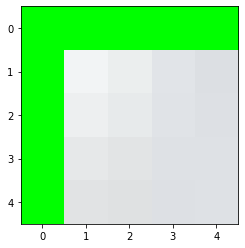

In [29]:

im =  cv2.imread(image_path)
im = cv2.resize(im,(800,800))

imgheight=im.shape[0]
imgwidth=im.shape[1]

y1 = 0
M = imgheight//15
N = imgwidth//15

for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        y1 = y + M
        x1 = x + N
        tiles = im[y:y+M,x:x+N]
        cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
#         cv2.imwrite("save/" + str(x) + '_' + str(y)+".png",tiles)
        imshow(tiles)

# cv2.imwrite("asas.png",im)


In [30]:
#Adam's code

gray = cv2.cvtColor(tiles[90], cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
imshow(threshed, cmap="gray")
plt.show()


IndexError: index 90 is out of bounds for axis 0 with size 5

In [ ]:
filename = 'chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()


In [74]:

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 


In [93]:
img = tiles_im[90]

gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(gray, config=custom_config)

TypeError: Expected Ptr<cv::UMat> for argument 'src'